## 使用pandas 讀取資料

In [6]:
import pandas as pd
# 使用index_col => 使用Date 當做索引, parse_dates => 將資料轉換為日期格式
data = pd.read_csv('C:\\Users\\Student\GoogleTrendsData.csv', index_col='Date', parse_dates=True)
data.head()

,djia,debt
Date,,
2004-01-14,10485.18,0.210000
2004-01-22,10528.66,0.210000
2004-01-28,10702.51,0.210000
2004-02-04,10499.18,0.213333
2004-02-11,10579.03,0.200000


In [8]:
# 計算相關係數
data.corr()

,djia,debt
djia,1.000000,-0.420986
debt,-0.420986,1.000000


In [9]:
# 觀察數據輪廓
data.describe()

,djia,debt
count,373.000000,373.000000
mean,10915.364504,0.195389
std,1432.781912,0.027646
min,6547.050000,0.120000
25%,10238.220000,0.180000
50%,10725.430000,0.190000
75%,11857.810000,0.210000
max,14087.550000,0.316667


In [11]:
#列出DataFrame 的資訊
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373 entries, 2004-01-14 to 2011-03-02
Data columns (total 2 columns):
djia    373 non-null float64
debt    373 non-null float64
dtypes: float64(2)
memory usage: 8.7 KB


## 繪製GoogleTrend 與股價的關係

Populating the interactive namespace from numpy and matplotlib


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009F85978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A13B0B8>], dtype=object)

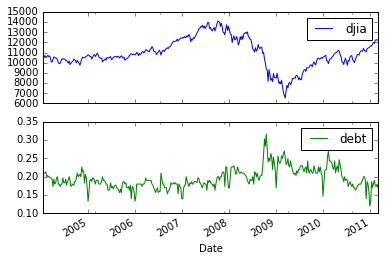

In [12]:
%pylab inline #讓我們的圖表在Jupyter Notebook 中產生
data.plot(subplots=True) # subplots 將所有數據畫在同一張圖上

## 算出Search Word 三週的移動平均

In [13]:
#因為我們的日期區間是一星期，　所以rolling_mean 參數為3 代表取三週移動平均
data['debt_mavg'] = pd.rolling_mean(data.debt, 3) 
data.head()

C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
  from ipykernel import kernelapp as app


,djia,debt,debt_mavg
Date,,,
2004-01-14,10485.18,0.210000,NaN
2004-01-22,10528.66,0.210000,NaN
2004-01-28,10702.51,0.210000,0.210000
2004-02-04,10499.18,0.213333,0.211111
2004-02-11,10579.03,0.200000,0.207778


Populating the interactive namespace from numpy and matplotlib


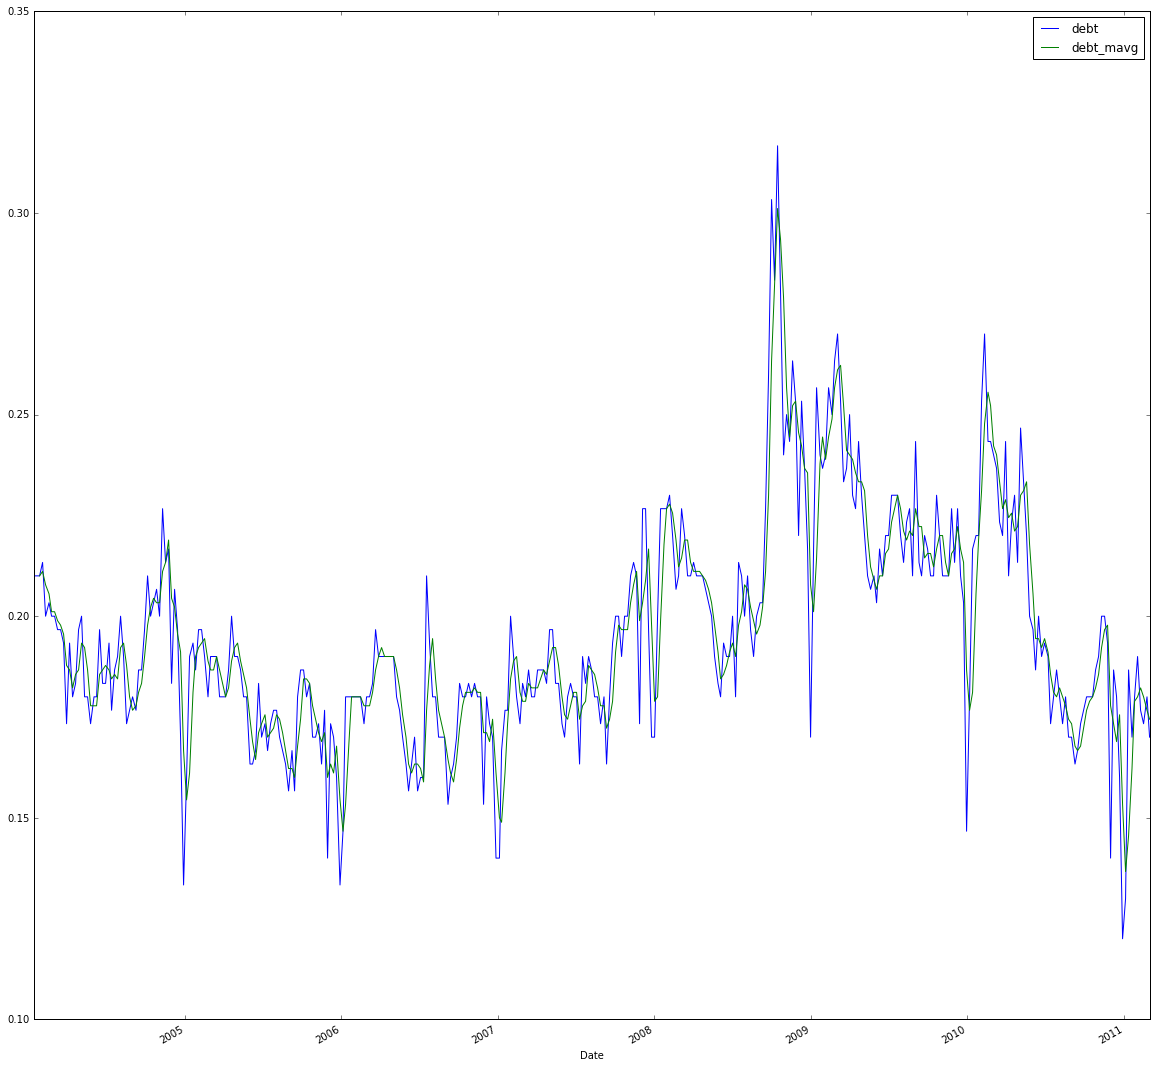

In [18]:
%pylab inline 
data[['debt','debt_mavg']].plot(figsize=[20,20])

## 將三週平均資料平移一天

In [19]:
data['debt_mavg'] = data.debt_mavg.shift(1)
data.head(10)

,djia,debt,debt_mavg
Date,,,
2004-01-14,10485.18,0.210000,NaN
2004-01-22,10528.66,0.210000,NaN
2004-01-28,10702.51,0.210000,NaN
2004-02-04,10499.18,0.213333,0.210000
2004-02-11,10579.03,0.200000,0.211111
2004-02-19,10714.88,0.203333,0.207778
2004-02-25,10609.62,0.200000,0.205555
2004-03-03,10678.14,0.200000,0.201111
2004-03-10,10529.48,0.196667,0.201111


Populating the interactive namespace from numpy and matplotlib


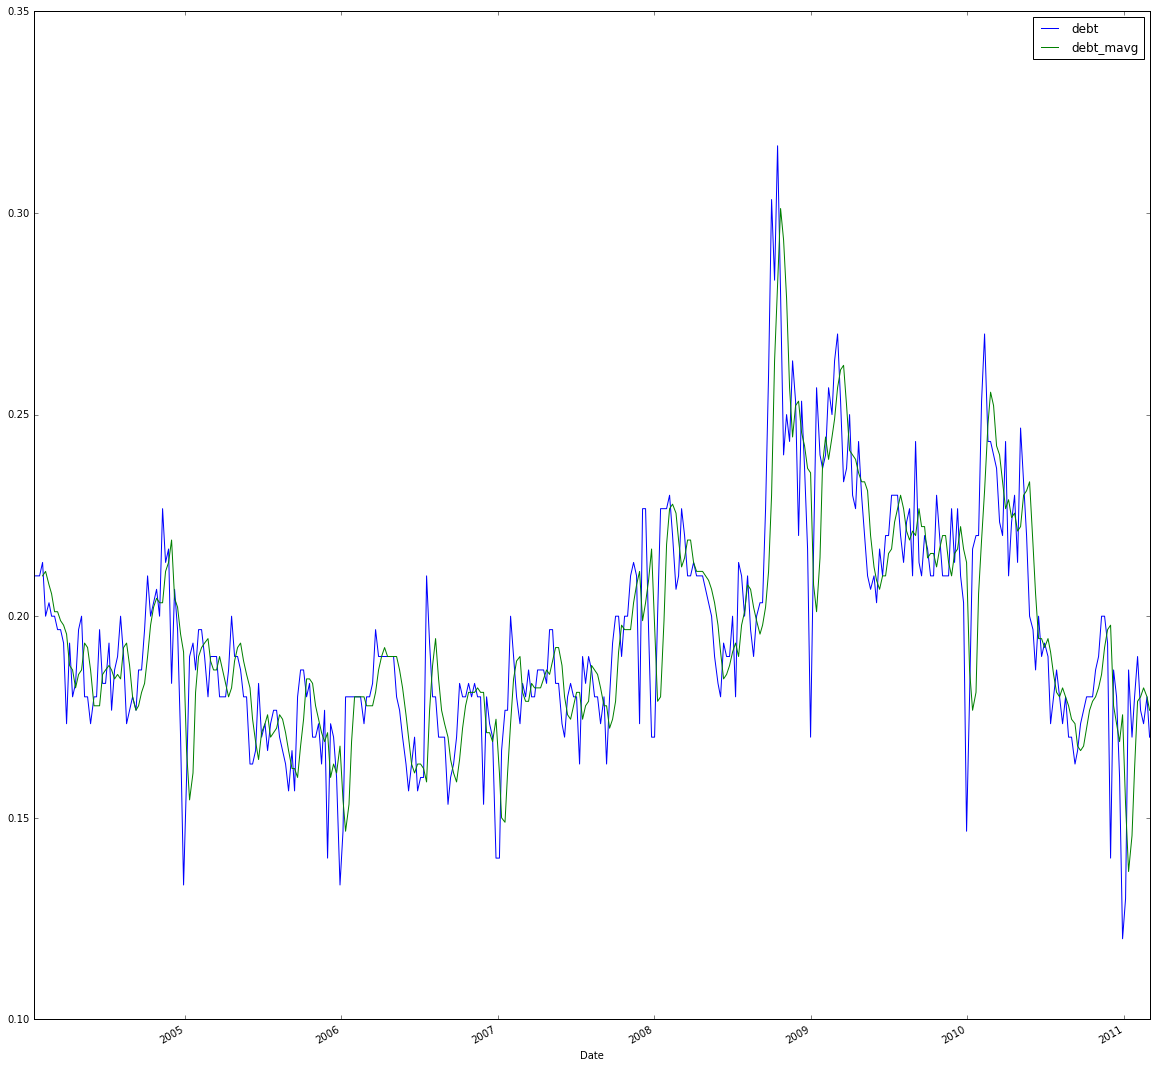

In [20]:
%pylab inline 
data[['debt','debt_mavg']].plot(figsize=[20,20])

## 設定買賣策略

In [21]:
data['order'] = 0

In [23]:
data.head()

,djia,debt,debt_mavg,order
Date,,,,
2004-01-14,10485.18,0.210000,NaN,0
2004-01-22,10528.66,0.210000,NaN,0
2004-01-28,10702.51,0.210000,NaN,0
2004-02-04,10499.18,0.213333,0.210000,0
2004-02-11,10579.03,0.200000,0.211111,0


In [26]:
#data.debt > data.debt_mavg

In [27]:
# Debt Term 黃金交叉賣出
data['order'][data.debt > data.debt_mavg] = -1 
# Debt Term 死亡交叉買進
data['order'][data.debt < data.debt_mavg] = 1
data.head(10)

C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Student\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,djia,debt,debt_mavg,order
Date,,,,
2004-01-14,10485.18,0.210000,NaN,0
2004-01-22,10528.66,0.210000,NaN,0
2004-01-28,10702.51,0.210000,NaN,0
2004-02-04,10499.18,0.213333,0.210000,-1
2004-02-11,10579.03,0.200000,0.211111,1
2004-02-19,10714.88,0.203333,0.207778,1
2004-02-25,10609.62,0.200000,0.205555,1
2004-03-03,10678.14,0.200000,0.201111,1
2004-03-10,10529.48,0.196667,0.201111,1


## 計算道瓊報酬

In [31]:
d1 = data.djia.pct_change() # 算出每週報酬
d2 = data.djia / data.djia.shift(1) - 1 # 算出每週報酬

In [32]:
d1.head()

Date
2004-01-14         NaN
2004-01-22    0.004147
2004-01-28    0.016512
2004-02-04   -0.018998
2004-02-11    0.007605
Name: djia, dtype: float64

In [33]:
d2.head()

Date
2004-01-14         NaN
2004-01-22    0.004147
2004-01-28    0.016512
2004-02-04   -0.018998
2004-02-11    0.007605
Name: djia, dtype: float64

In [34]:
data['ret_djia'] = data.djia.pct_change()
data.head()

,djia,debt,debt_mavg,order,ret_djia
Date,,,,,
2004-01-14,10485.18,0.210000,NaN,0,NaN
2004-01-22,10528.66,0.210000,NaN,0,0.004147
2004-01-28,10702.51,0.210000,NaN,0,0.016512
2004-02-04,10499.18,0.213333,0.210000,-1,-0.018998
2004-02-11,10579.03,0.200000,0.211111,1,0.007605


## 根據買賣日調整

In [35]:
data['ret_djia'] = data['ret_djia'].shift(-1)

In [37]:
data.head()

,djia,debt,debt_mavg,order,ret_djia
Date,,,,,
2004-01-14,10485.18,0.210000,NaN,0,0.004147
2004-01-22,10528.66,0.210000,NaN,0,0.016512
2004-01-28,10702.51,0.210000,NaN,0,-0.018998
2004-02-04,10499.18,0.213333,0.210000,-1,0.007605
2004-02-11,10579.03,0.200000,0.211111,1,0.012841


In [38]:
data['ret_google'] = data.order * data.ret_djia
data.head(10)

,djia,debt,debt_mavg,order,ret_djia,ret_google
Date,,,,,,
2004-01-14,10485.18,0.210000,NaN,0,0.004147,0.000000
2004-01-22,10528.66,0.210000,NaN,0,0.016512,0.000000
2004-01-28,10702.51,0.210000,NaN,0,-0.018998,-0.000000
2004-02-04,10499.18,0.213333,0.210000,-1,0.007605,-0.007605
2004-02-11,10579.03,0.200000,0.211111,1,0.012841,0.012841
2004-02-19,10714.88,0.203333,0.207778,1,-0.009824,-0.009824
2004-02-25,10609.62,0.200000,0.205555,1,0.006458,0.006458
2004-03-03,10678.14,0.200000,0.201111,1,-0.013922,-0.013922
2004-03-10,10529.48,0.196667,0.201111,1,-0.040514,-0.040514


In [40]:
data['ret_google'].head()

Date
2004-01-14    0.000000
2004-01-22    0.000000
2004-01-28   -0.000000
2004-02-04   -0.007605
2004-02-11    0.012841
Name: ret_google, dtype: float64

In [43]:
data.ret_google.head()

Date
2004-01-14    0.000000
2004-01-22    0.000000
2004-01-28   -0.000000
2004-02-04   -0.007605
2004-02-11    0.012841
Name: ret_google, dtype: float64

## cumprod 可以累計乘積

In [52]:
df = pd.DataFrame({'val':[0.7,0.5,1.2,1.5]})
df.val.cumprod()

0    0.70
1    0.35
2    0.42
3    0.63
Name: val, dtype: float64

## 觀察資金變化

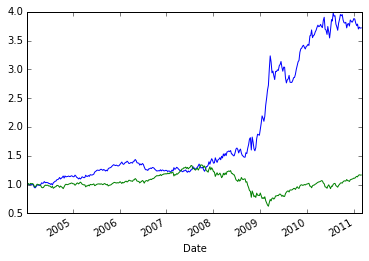

In [54]:
(1 + data.ret_google).cumprod().plot();
(1 + data.ret_djia).cumprod().plot();